## Comics project - data visualisation

This project is non-profit, personal project for education purposes only.

1) Import the data from scraped the sqlite3 db
2) Explore the data

Thanks to the people from https://www.comicsdb.cz/ project.

### Import the data from scraped the sqlite3 db

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

def fetch_df_from_db(cursor, sql):
    """Gets cursor and SQL code and runs the SQL code on the cursor. Returns ready dataframe from the db data."""
    try:
        result = cursor.execute(sql)
        rows = result.fetchall()
        columns = [column[0] for column in cursor.description]
    except:
        print("Error - have not fetched all the data from sqlite3 db - in the fetch_df_from_db()")
    else:
        return pd.DataFrame(rows, columns=columns)

def get_all_data():
    """Gets all the data from sqlite3 db."""
    try:
        conn = sqlite3.connect("./db/comics.db")
        cur = conn.cursor()
        titles_db = fetch_df_from_db(cur, "SELECT * FROM titles;")
        publishers_db = fetch_df_from_db(cur, "SELECT * FROM publishers;")
    except:
        print("Error - have not fetched all the data from sqlite3 db - in the get_all_data()")
    else:
        return [titles_db, publishers_db]
    finally:
        conn.close()

titles, publishers = get_all_data()

### Explore the data

Text(0.5, 1.0, 'Number of published titles by year')

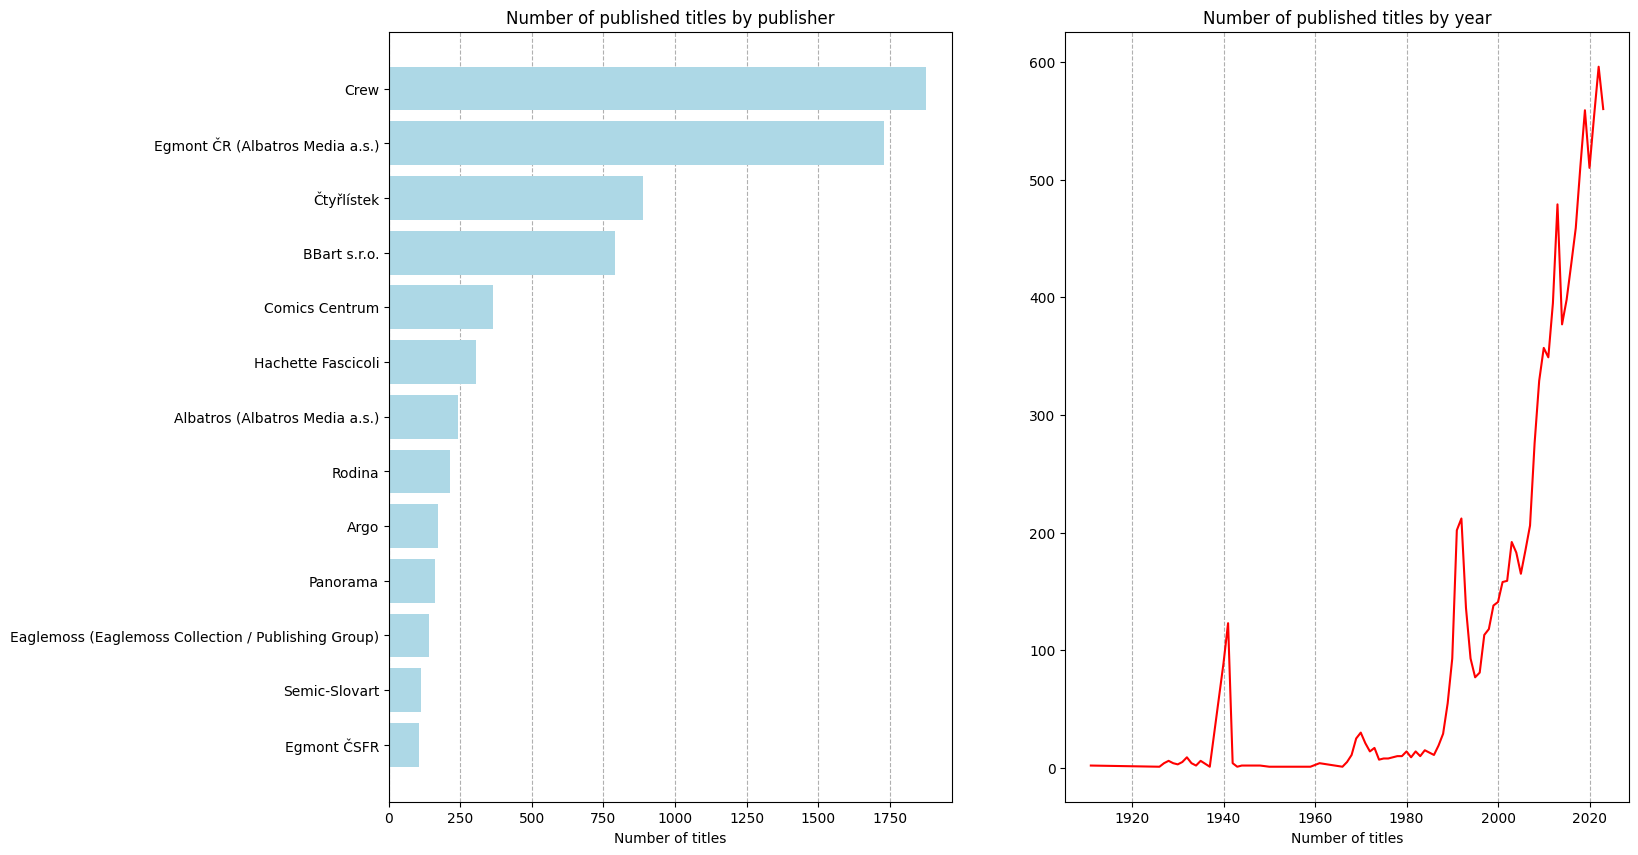

In [3]:
# df for charts
titles_chart = titles[titles["year"] > 0].groupby("year")["title_id"].count()
publishers_chart = publishers[publishers["number_of_titles"] > 100].sort_values("number_of_titles")

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(1,2,1)
ax1.grid(True, axis="x", linestyle="--", zorder=1)
ax1.barh(publishers_chart["name"], publishers_chart["number_of_titles"], color="lightblue", zorder=2)
ax1.set_xlabel('Number of titles')
ax1.set_title('Number of published titles by publisher')

ax2 = fig.add_subplot(1,2,2)
ax2.grid(True, axis="x", linestyle="--", zorder=1)
ax2.plot(titles_chart, color="red", zorder=2)
ax2.set_xlabel('Number of titles')
ax2.set_title('Number of published titles by year')